# R laboratory exercises 01
### Laboratory session: March 31, 2021
### Exercises due on: April 18, 2021

#### Samuele Piccinelli, 2027650
#### samuele.piccinelli@studenti.unipd.it

In [1]:
# import libraries and useful dependencies
library(data.table)
library(ggplot2)
library(tibble)
library(curl)
library(scales)
# plot settings
options(repr.plot.width=16, repr.plot.height=6)
theme_set(theme(text=element_text(size=20,  family="Times New Roman")))

#### Exercise 1
The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes. Create vectors, holding the lake's name and all the parameters and build a dataframe called `scottish.lakes` from the vectors.

1. Evaluate the highest and lowest volume and area lake.

2. Order the frame with respect to the area and determine the two largest area lakes.

3. By summing up the areas occupied by the lakes, determine the area of Scotland covered by water.

In [2]:
loch <- c("Loch Ness","Loch Lomond","Loch Morar","Loch Tay","Loch Awe","Loch Maree","Loch Ericht",
          "Loch Lochy","Loch Rannoch","Loch Shiel","Loch Katrine","Loch Arkaig","Loch Shin")

volume <- c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)
area <- c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)
length <- c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)
max_depth <- c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_depth <- c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.5)

scottish.lakes <- data.frame(loch,volume,area,length,max_depth,mean_depth, stringsAsFactors = FALSE)
scottish.lakes

loch,volume,area,length,max_depth,mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


In [3]:
highest_volume_lake <- scottish.lakes$loch[[which.max(scottish.lakes$volume)]]
paste("Highest volume lake: ", highest_volume_lake,' with ',max(scottish.lakes$volume),'$km^3$')
lowest_volume_lake <- scottish.lakes$loch[[which.min(scottish.lakes$volume)]]
paste("Lowest volume lake: ", lowest_volume_lake,' with ',min(scottish.lakes$volume),'$km^3$')

highest_area_lake <- scottish.lakes$loch[[which.max(scottish.lakes$area)]]
paste("Highest area lake: ", highest_area_lake,' with ',max(scottish.lakes$area),'$km^2$')
lowest_area_lake <- scottish.lakes$loch[[which.min(scottish.lakes$area)]]
paste("Highest area lake: ", lowest_area_lake,' with ',min(scottish.lakes$area),'$km^2$')

[1] "Highest volume lake:  Loch Ness  with  7.45 $km^3$"

[1] "Lowest volume lake:  Loch Shin  with  0.35 $km^3$"

[1] "Highest area lake:  Loch Lomond  with  71 $km^2$"

[1] "Highest area lake:  Loch Katrine  with  12.4 $km^2$"

In [4]:
lakes_by_area <- scottish.lakes[order(area,decreasing = TRUE),]
row.names(lakes_by_area) <- 1:nrow(lakes_by_area) # resetting indices
lakes_by_area

paste("The two largest lakes are: ",lakes_by_area$loch[1],', ',lakes_by_area$loch[2] )

,loch,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Loch Lomond,2.60,71.0,36.0,190,37.0
2,Loch Ness,7.45,56.0,39.0,230,132.0
3,Loch Awe,1.20,39.0,41.0,94,32.0
4,Loch Maree,1.09,28.6,20.0,114,38.0
5,Loch Morar,2.30,27.0,18.8,310,87.0
6,Loch Tay,1.60,26.4,23.0,150,60.6
7,Loch Shin,0.35,22.5,27.8,49,15.5
8,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0


[1] "The two largest lakes are:  Loch Lomond ,  Loch Ness"

In [5]:
total_lake_area <- sum(scottish.lakes$area)
paste("Total area of Scotland covered by water: ", total_lake_area, "$km^2$")

[1] "Total area of Scotland covered by water:  372 $km^2$"

#### Exercise 2

The following CSV file: https://drive.google.com/file/d/1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3/view contains data on crude oil prices from $1861$ to $2019$, measured in US dollars per barrel.

1. Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).
2. Produce a plot with the oil price as a function of the year.
3. Which is the highest price in history? When did it occur?
4. Plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative): $$\frac{\partial{\mathrm{price}}}{\partial{\mathrm{year}}} = \mathrm{price}_{j+1} - \mathrm{price}_{j}$$

In [6]:
crude_oil_prices <- tibble(read.table('data/crude-oil-prices.csv', sep=',', header =TRUE))
head(crude_oil_prices, 10)

Entity,Code,Year,OilPrice
<fct>,<fct>,<int>,<dbl>
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74
World,OWID_WRL,1867,2.41
World,OWID_WRL,1868,3.63
World,OWID_WRL,1869,3.64


In [7]:
crude_oil_prices <- crude_oil_prices[,-(1:2),drop=FALSE] # drop first 2 columns containing no significant data
head(crude_oil_prices, 5)

Year,OilPrice
<int>,<dbl>
1861,0.49
1862,1.05
1863,3.15
1864,8.06
1865,6.59


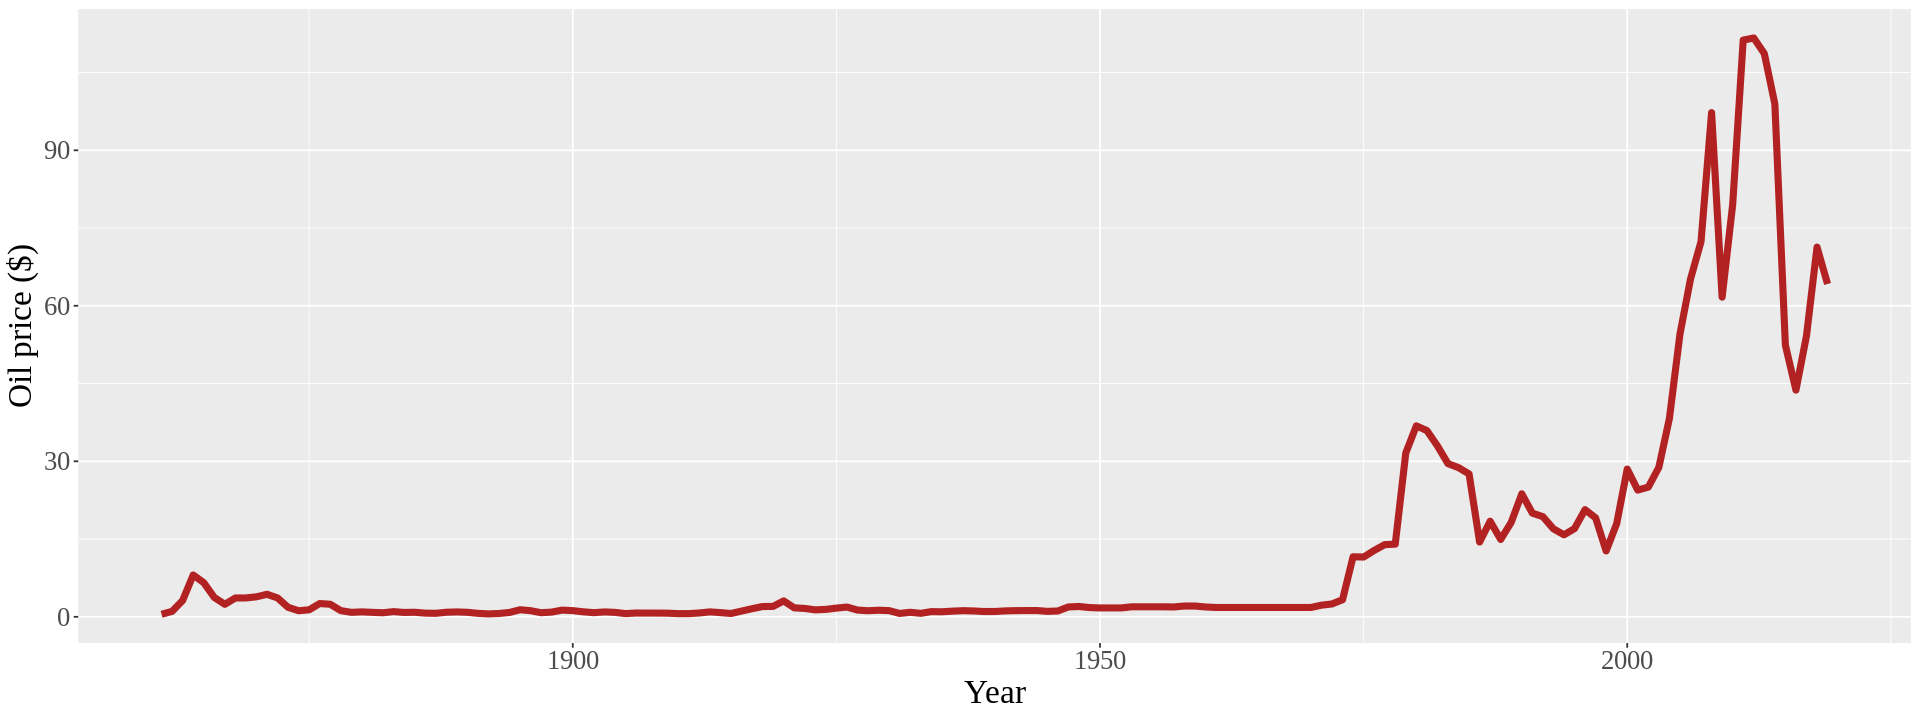

In [8]:
ggplot(data=crude_oil_prices, aes(x=Year, y=OilPrice)) + geom_line(color='firebrick', size=2) + ylab('Oil price ($)')

In [9]:
highest_price <- round(max(crude_oil_prices$OilPrice), 2)
highest_price_year <- crude_oil_prices$Year[[which.max(crude_oil_prices$OilPrice)]]

paste("The highest price in history was of", highest_price, "$ in", highest_price_year)

[1] "The highest price in history was of 111.67 $ in 2012"

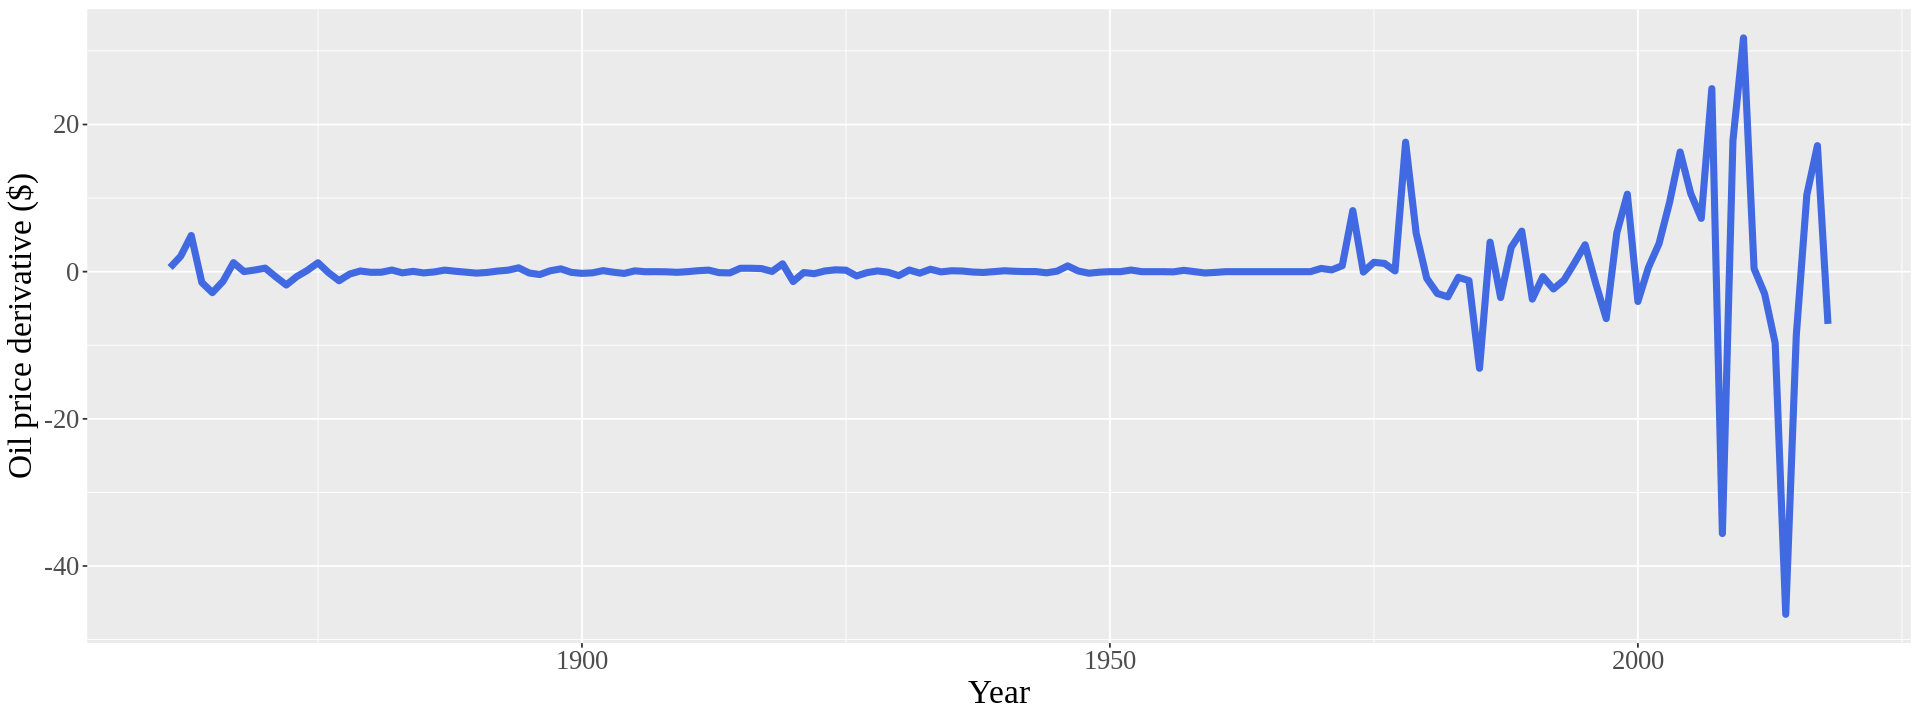

In [10]:
derivative <- diff(crude_oil_prices$OilPrice)
Year <- crude_oil_prices$Year[1:(length(crude_oil_prices$Year)-1)]

ggplot() + geom_line(aes(x=Year, y=derivative), color='royalblue', size=2) + ylab('Oil price derivative ($)')

#### Exercise 3

The following CSV file https://drive.google.com/file/d/10kgRQGKEC81QoVW9kj8goNzzyLcT0xld/view contains data on the coal production (in TW $\cdot$ hour) for several countries in the World.
1. Write R code that is able to read the file and import it in a tibble structure.
2. Count the number of countries available in the file and produce a barplot with the number of entries for each country.

For the following items select only the years $\geq$ 1970:<br>
3. Determine the total integrated production for each country and print the top 5 countries with highest coal production.<br>
4. For the 5 top countries, create a plot of production as a function of time.<br>
5. Generate a plot with the cumulative sum of the world's coal production over the years.

Having observed that the file contains continents rather than countries in correspondence of a blank space in the `code` column, when importing the file each blank space is replaced by an `NA` tag in order to be able to later drop the corresponding rows through the command `complete.cases()`.

In [11]:
coal_prod_by_country <- tibble(read.table('data/coal-production-by-country.csv', sep=',', header =TRUE, na.strings=c(""," ","NA")))
paste(length(unique(coal_prod_by_country$Entity)), 'countries are available in the dataset')
colnames(coal_prod_by_country) = c('Entity', 'Code', 'Year', 'Prod_TWh')

coal_prod_by_country <- coal_prod_by_country[complete.cases(coal_prod_by_country), ] # drop elements with no code

[1] "200 countries are available in the dataset"

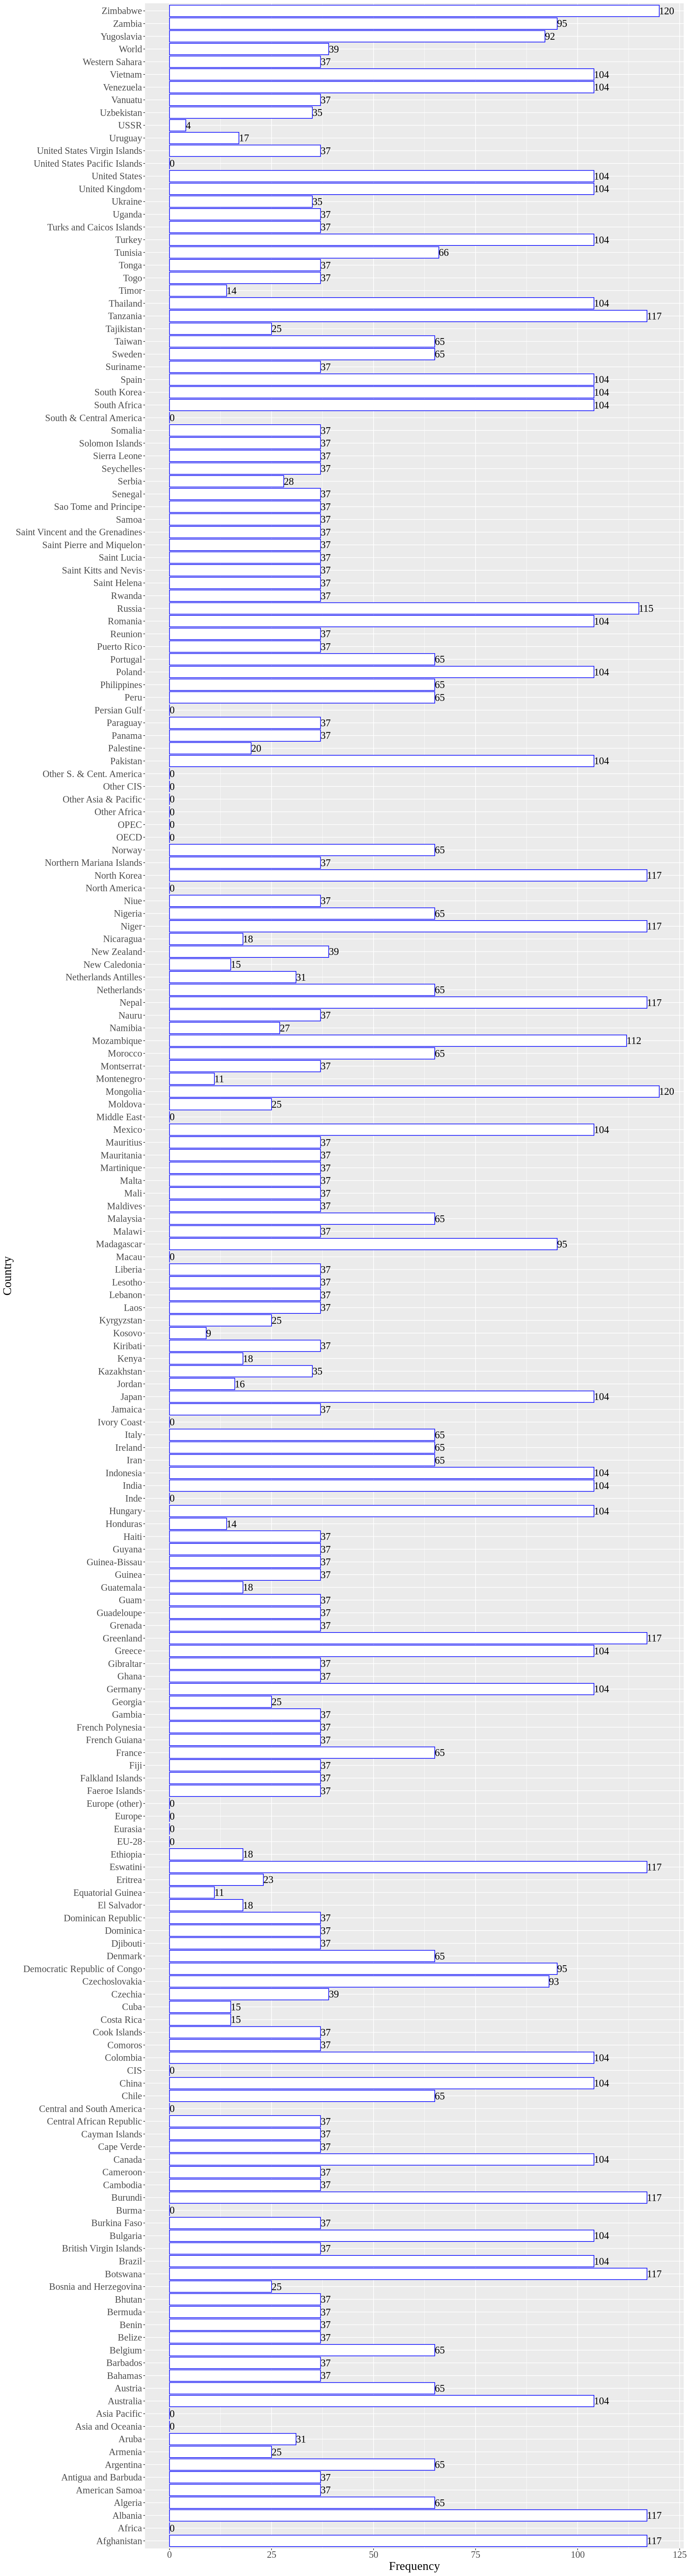

In [12]:
freq <- as.data.frame(table(coal_prod_by_country$Entity)) # builds a contingency table of the counts
colnames(freq) = c('Country', 'Frequency')

options(repr.plot.width=16, repr.plot.height=60) # re-define plot parameters
ggplot(freq, aes(Country, Frequency)) + geom_bar(stat="identity", colour='blue', fill='white') + coord_flip() +
geom_text(aes(label=Frequency), hjust = 0, size=6, family = "Times New Roman")

In [13]:
after1970 <- coal_prod_by_country[coal_prod_by_country$Year >= 1970, ]
# aggregate by country and sum over the corresponding elements in the production column
total_integrated_production <- aggregate(after1970["Prod_TWh"], by=after1970["Entity"], sum)
# order the dataframe in decreasing order
country_by_production <- total_integrated_production[order(total_integrated_production$Prod_TWh, decreasing = TRUE),]
paste('The top 5 Countries with highest coal productions are: ')
top5 <- country_by_production[c(2:6), "Entity"] # drop world production at idx=1
paste(top5)

[1] "The top 5 Countries with highest coal productions are: "

[1] "China"         "United States" "Russia"        "Australia"    
[5] "India"

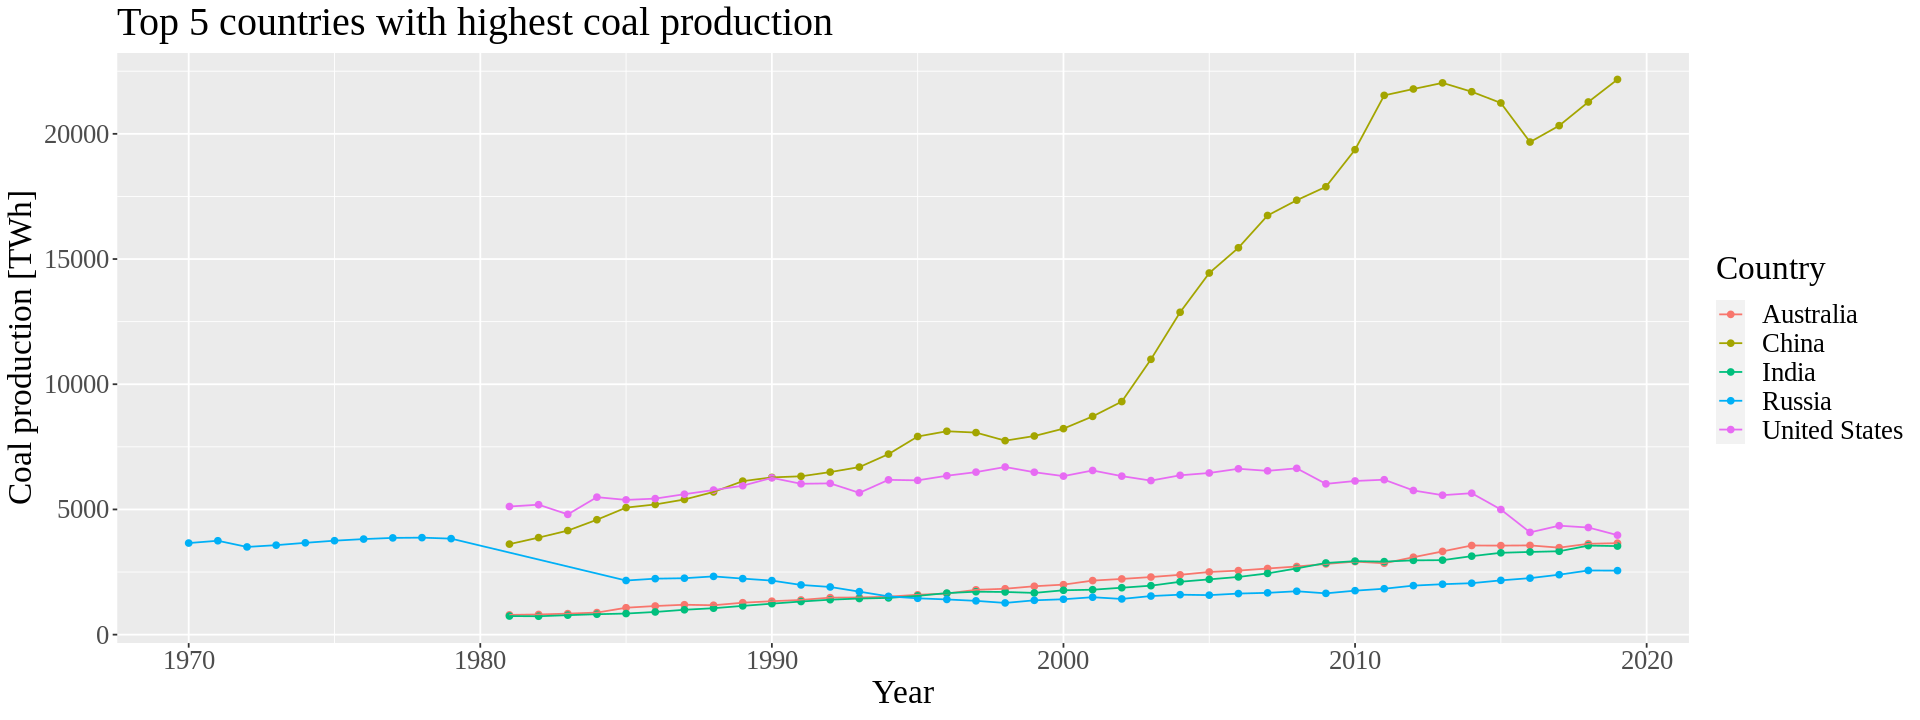

In [14]:
# select all the rows with countries in the top 5 highest coal producers list
df_top5 <- after1970[after1970$Entity %in% top5,]

options(repr.plot.width=16, repr.plot.height=6)
ggplot(df_top5, aes(Year, Prod_TWh, group=Entity, colour=Entity)) + geom_point() + geom_line() +
labs(title='Top 5 countries with highest coal production', x='Year', y='Coal production [TWh]', col='Country')

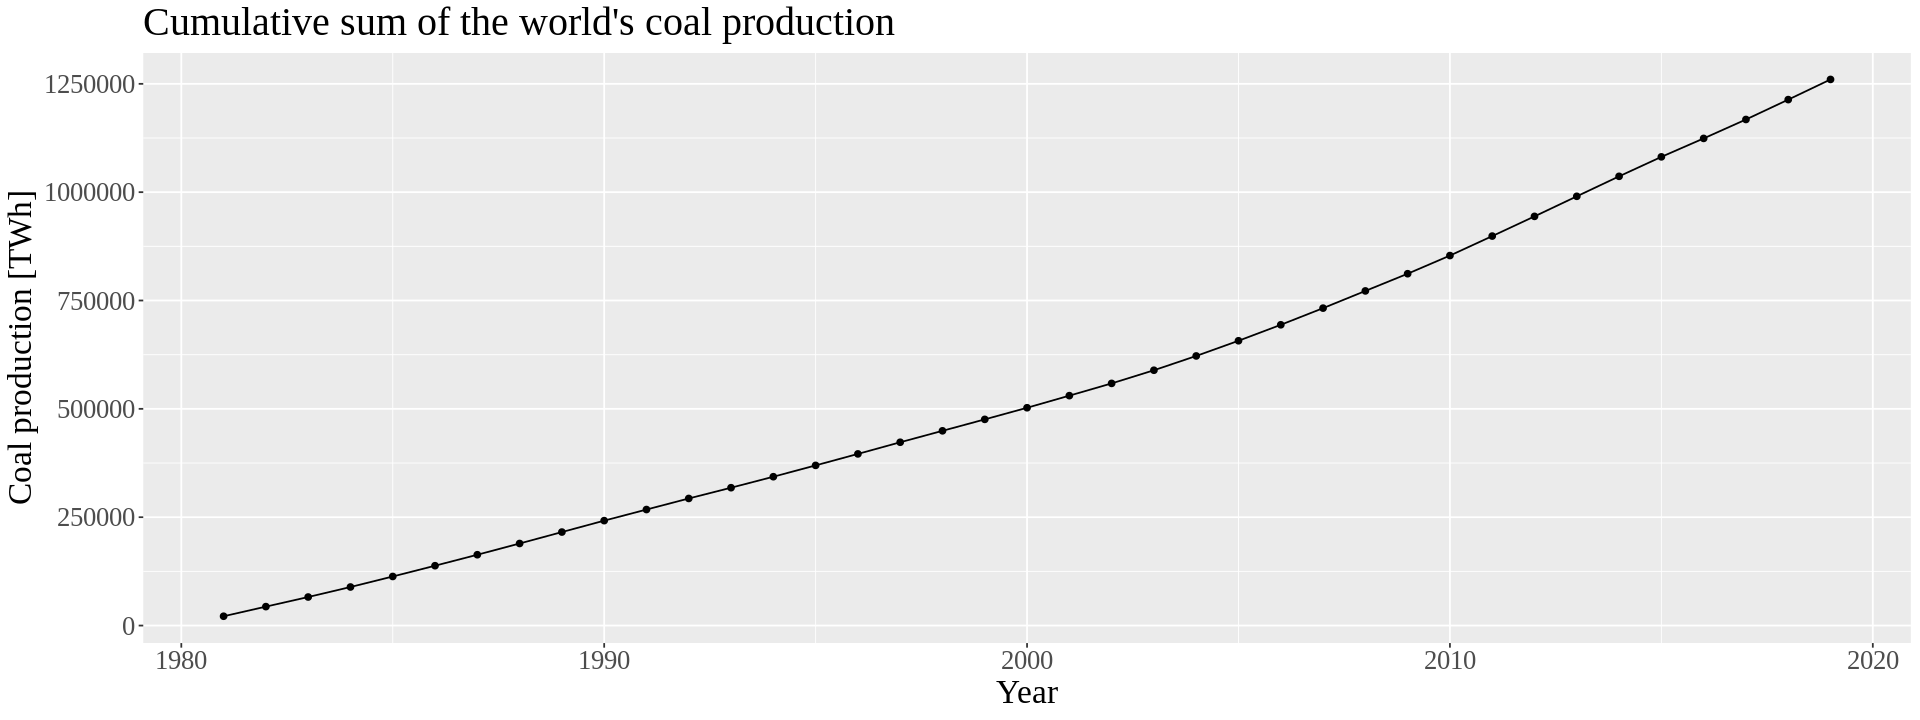

In [15]:
world_production <- after1970[after1970$Entity=='World',]
cumulative_sum <- cumsum(world_production$Prod_TWh)
ggplot(world_production, aes(Year, cumulative_sum)) + geom_point() + geom_line() +
labs(title='Cumulative sum of the world\'s coal production', x='Year', y='Coal production [TWh]')

#### Exercise 4

**Pt. 1**: The file `vaccinations-by-manufacturer.csv`, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv) contains a summary on the vaccination data grouped by vaccine type and country.

1. `filter()` the original tibble by selecting the following countries: Italy.
2. Plot the number of vaccines given as a function of time for the different vaccine manufacturer.
3. From the same tibble plot the total number of vaccines shot per day in Italy.
4. Do the same exercise for the following countries: Germany and United States of America.

**Pt. 2**: The file `vaccinations.csv`, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, ecc.) and international aggregates (World, continents, European Union _ldots_). They can be identified by their `iso_code` that starts with `OWID_`.
1. Select all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date.
2. Study the data structure and produce few relevant plots of your taste.

#### Pt. 1

In [16]:
url1 <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
vax_by_manufacturer <- tibble(read.csv(url1, sep=',', head=TRUE))
head(vax_by_manufacturer, 10)

location,date,vaccine,total_vaccinations
<fct>,<fct>,<fct>,<int>
Chile,2020-12-24,Pfizer/BioNTech,420
Chile,2020-12-25,Pfizer/BioNTech,5198
Chile,2020-12-26,Pfizer/BioNTech,8338
Chile,2020-12-27,Pfizer/BioNTech,8649
Chile,2020-12-28,Pfizer/BioNTech,8649
Chile,2020-12-29,Pfizer/BioNTech,8649
Chile,2020-12-30,Pfizer/BioNTech,8649
Chile,2020-12-31,Pfizer/BioNTech,8649
Chile,2021-01-01,Pfizer/BioNTech,8649


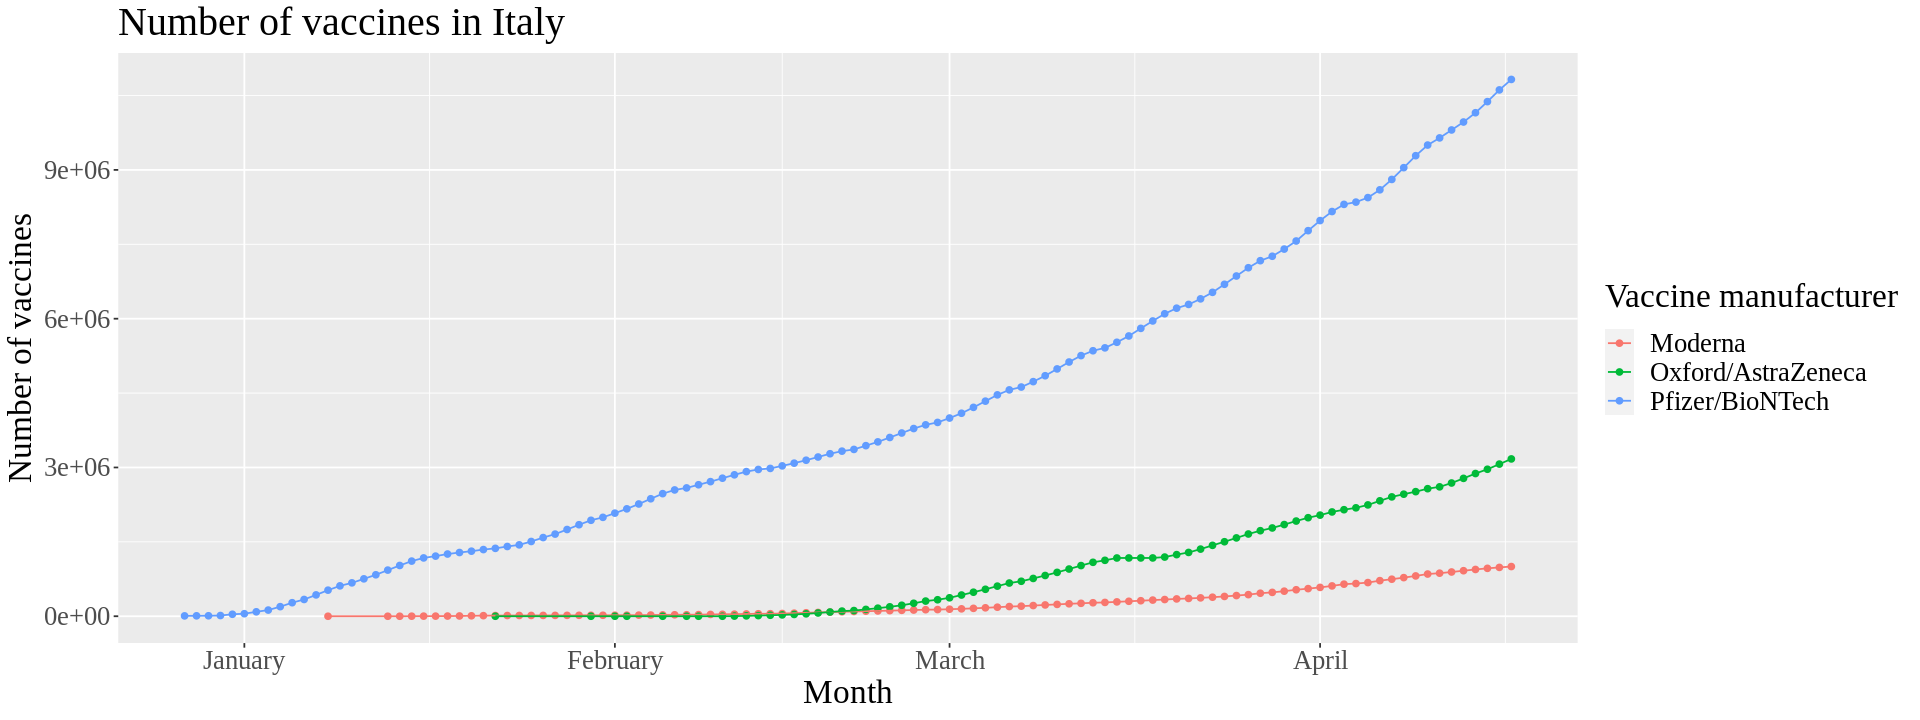

In [17]:
italy <- dplyr::filter(vax_by_manufacturer, location=="Italy")
# head(italy, 5)

ggplot(italy, aes(as.Date(date), total_vaccinations, group=vaccine, colour=vaccine)) + geom_point() + geom_line() +
scale_x_date(date_labels = "%B") +
labs(title='Number of vaccines in Italy', x='Month', y='Number of vaccines', col='Vaccine manufacturer')

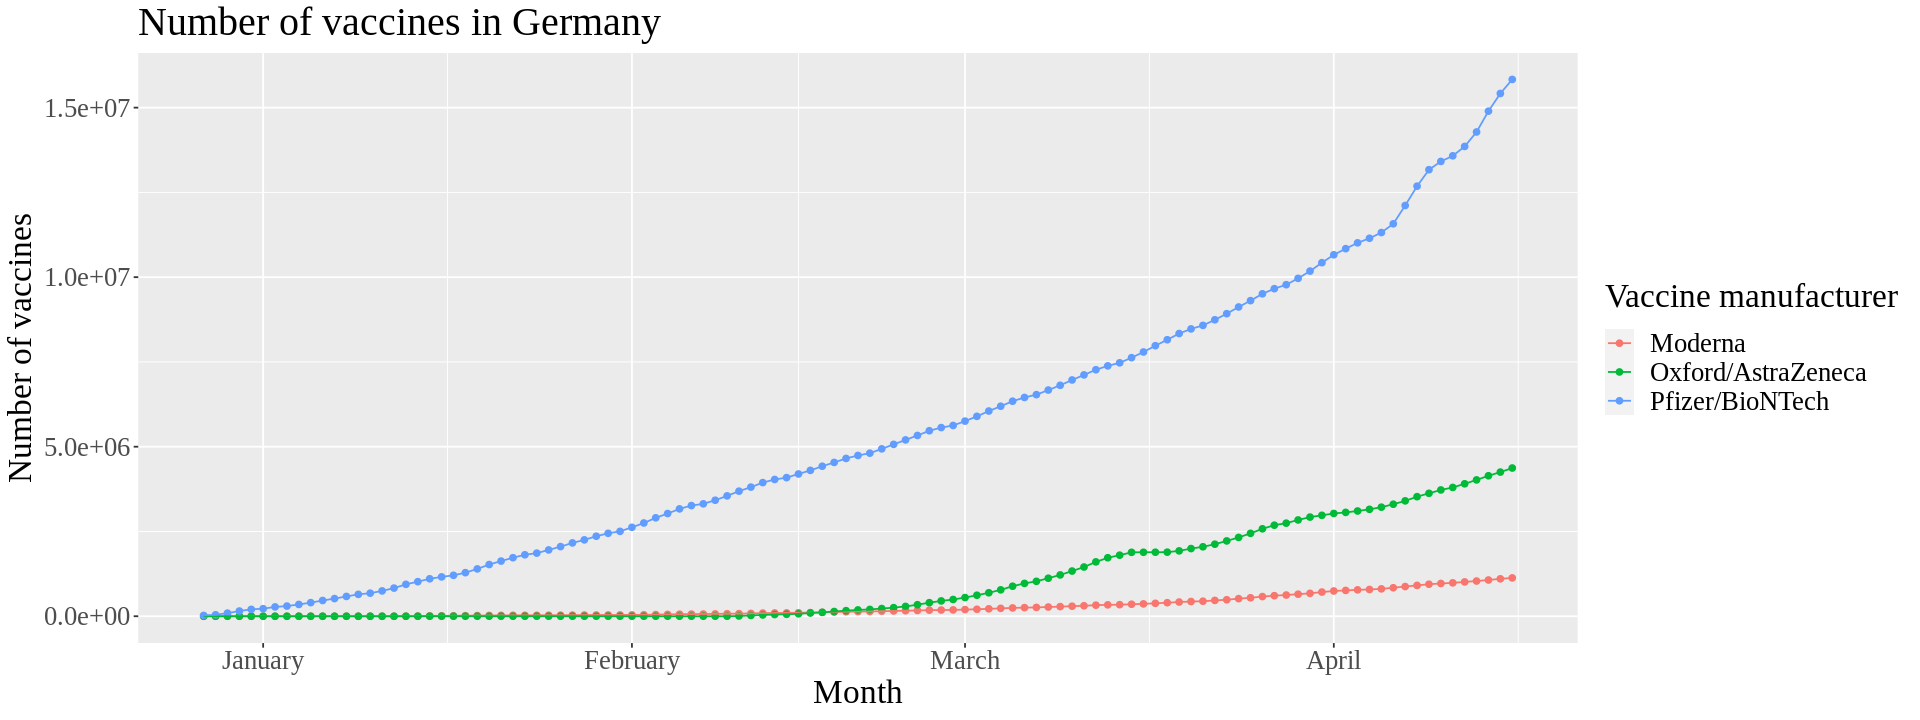

In [18]:
germany <- dplyr::filter(vax_by_manufacturer, location=="Germany")

ggplot(germany, aes(as.Date(date), total_vaccinations, group=vaccine, colour=vaccine)) + geom_point() + geom_line() +
scale_x_date(date_labels = "%B") +
labs(title='Number of vaccines in Germany', x='Month', y='Number of vaccines', col='Vaccine manufacturer')

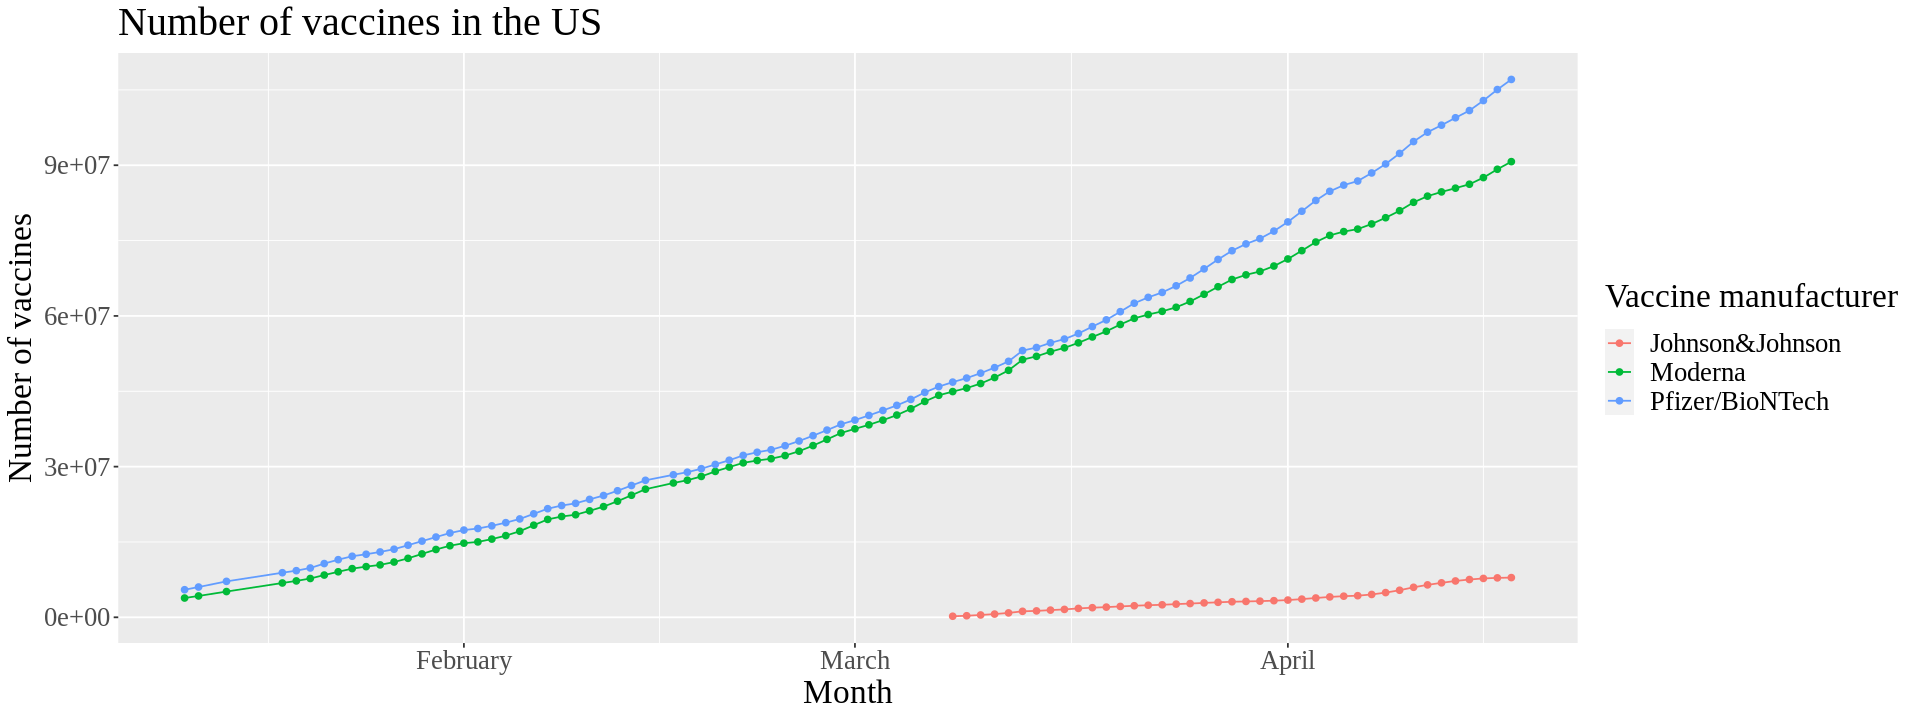

In [19]:
US <- dplyr::filter(vax_by_manufacturer, location=="United States")

ggplot(US, aes(as.Date(date), total_vaccinations, group=vaccine, colour=vaccine)) + geom_point() + geom_line() +
scale_x_date(date_labels = "%B") +
labs(title='Number of vaccines in the US', x='Month', y='Number of vaccines', col='Vaccine manufacturer')

In [20]:
# aggregate by date and sum over the corresponding elements in the total vaccinations column
vax_per_day_IT <- aggregate(italy["total_vaccinations"], by=italy["date"], sum)
vax_per_day_IT$country = 'IT' # creates a new column with a country tag
vax_per_day_DE <- aggregate(germany["total_vaccinations"], by=germany["date"], sum)
vax_per_day_DE$country = 'DE'
vax_per_day_US <- aggregate(US["total_vaccinations"], by=US["date"], sum)
vax_per_day_US$country = 'US'
# create a new dataframe by concatenating the previous 3 for easier plotting
vax_per_day <- rbind(vax_per_day_IT, vax_per_day_DE, vax_per_day_US)

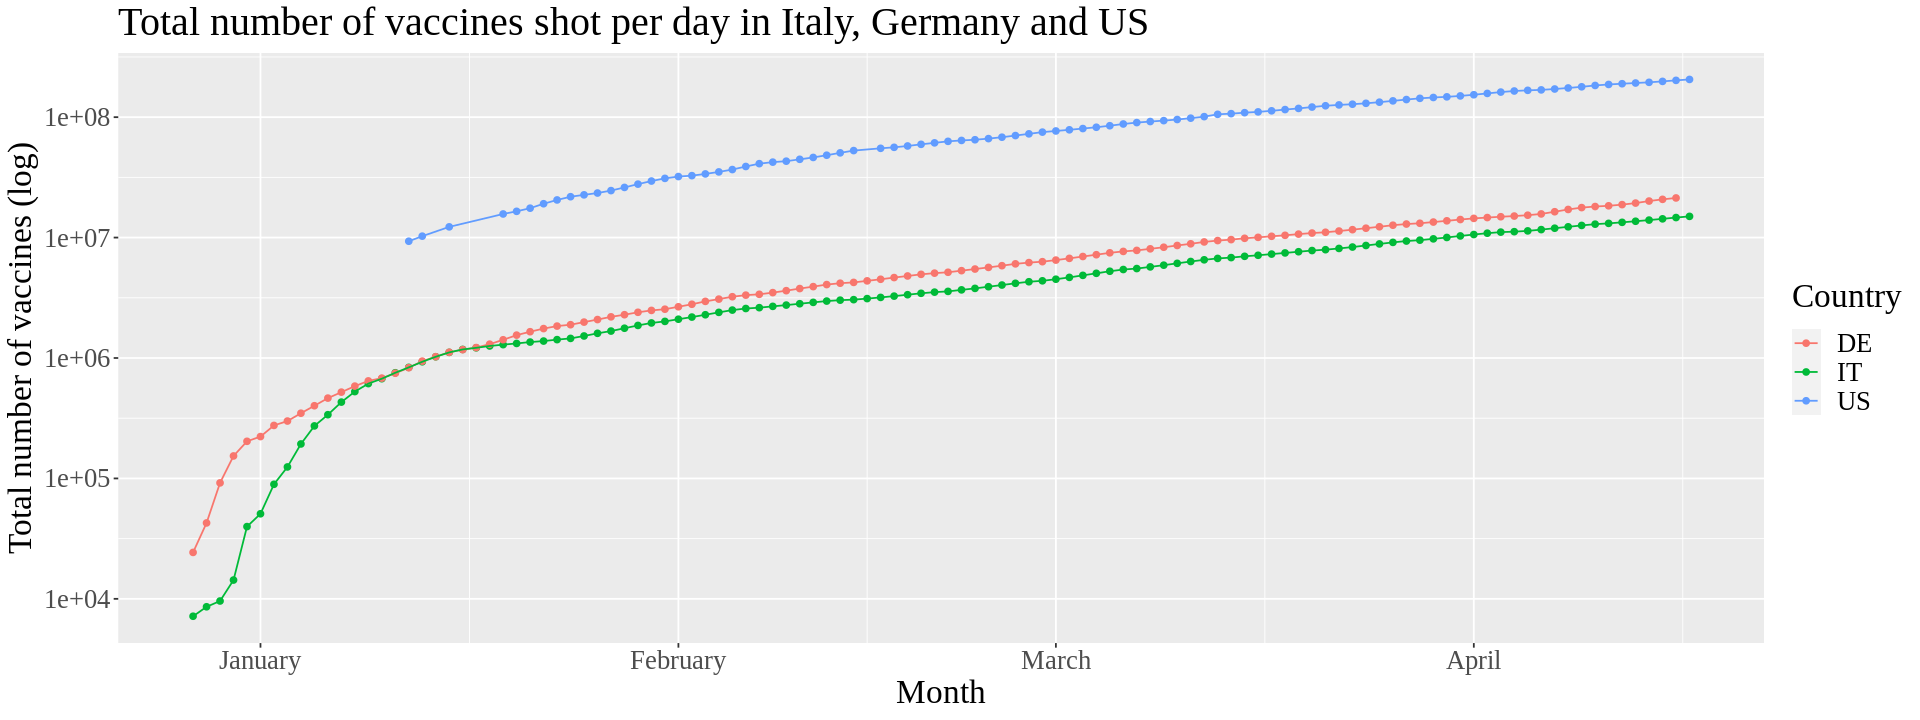

In [21]:
ggplot(vax_per_day, aes(as.Date(date), total_vaccinations, group=country, colour=country)) + geom_point() + geom_line() +
scale_x_date(date_labels = "%B") + scale_y_log10() +
labs(title='Total number of vaccines shot per day in Italy, Germany and US', x='Month',
     y='Total number of vaccines (log)', col='Country')

#### Pt. 2

In [22]:
url2 <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccinations <- tibble(read.csv(url2, sep=',', head=TRUE))
head(vaccinations, 5)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35


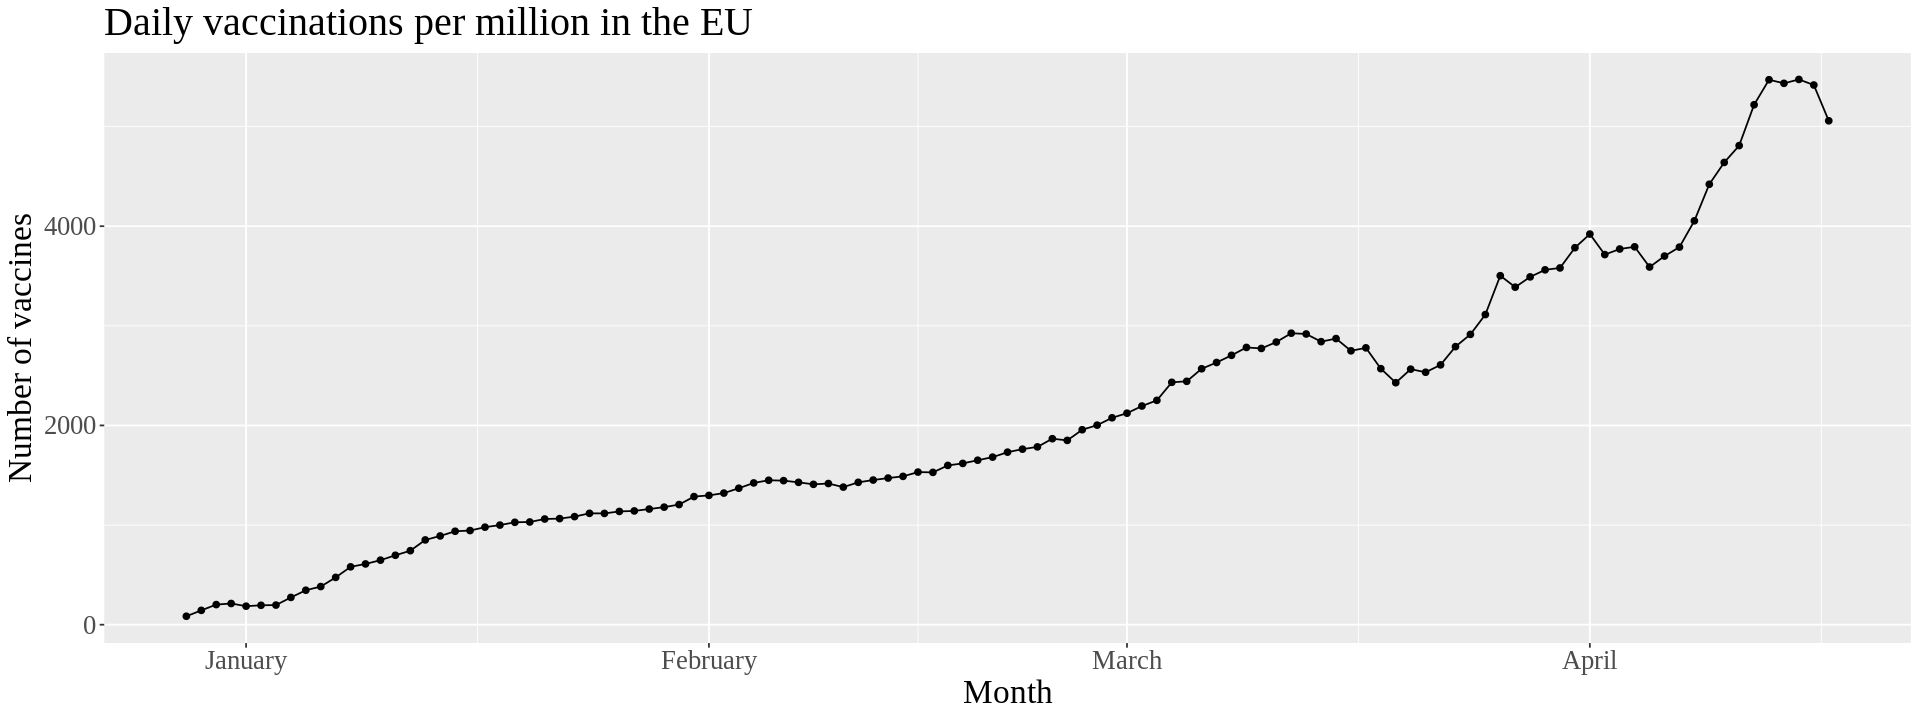

In [23]:
EU <- dplyr::filter(vaccinations, iso_code=="OWID_EUN")
EU <- EU[complete.cases(EU), ]

ggplot(EU, aes(as.Date(date), daily_vaccinations_per_million)) + geom_point() + geom_line() +
scale_x_date(date_labels = "%B") +
labs(title='Daily vaccinations per million in the EU', x='Month', y='Number of vaccines')

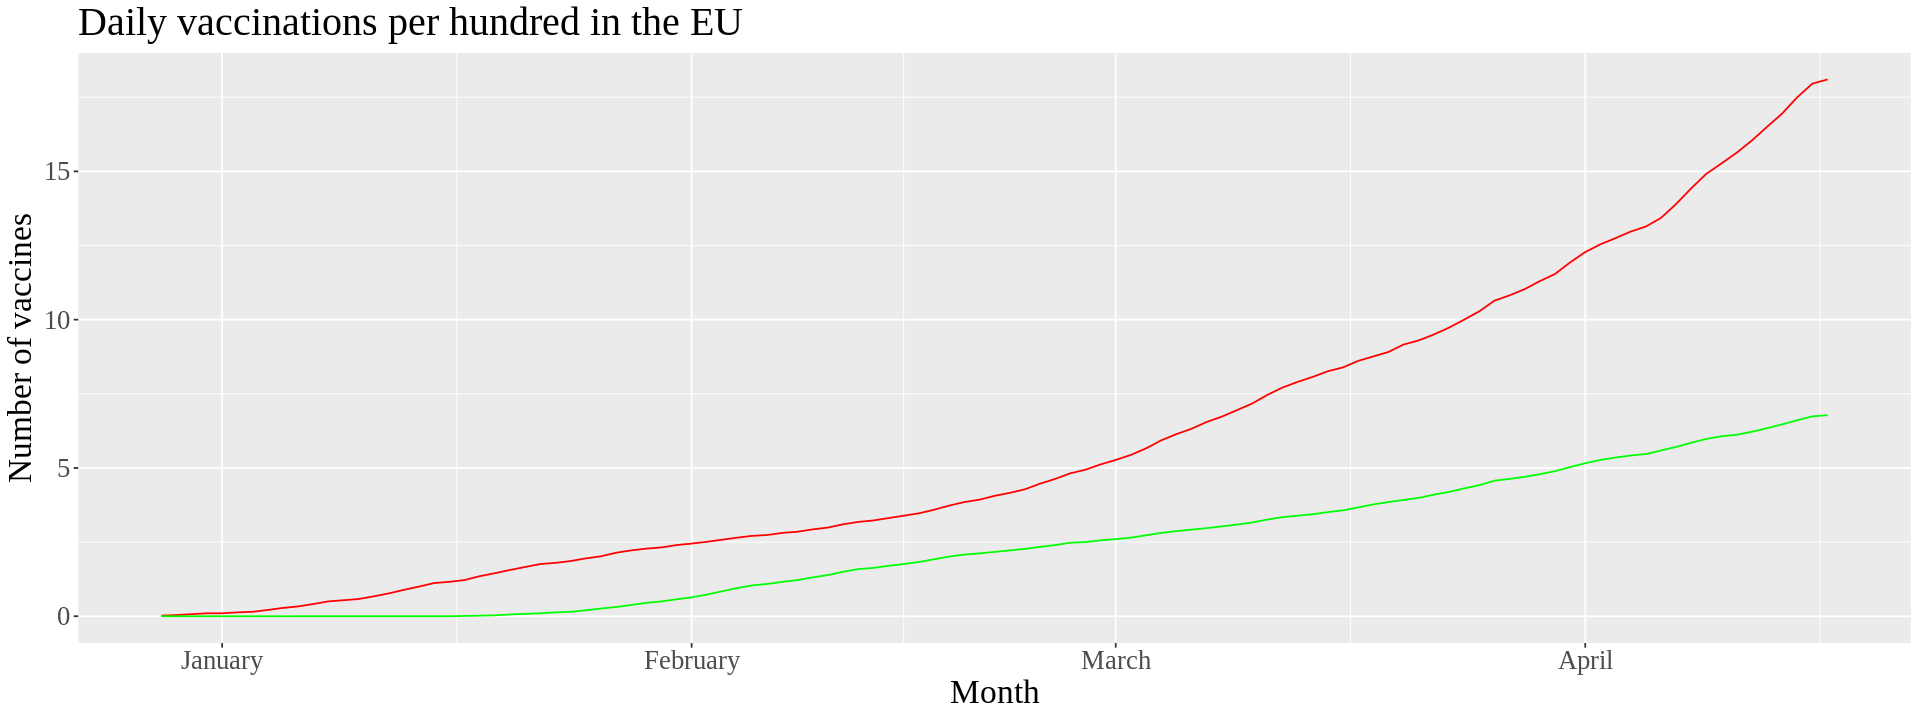

In [24]:
ggplot(EU, aes(as.Date(date), people_vaccinated_per_hundred)) + geom_line(color='red') +
geom_line(aes(as.Date(date), people_fully_vaccinated_per_hundred), color='green') + scale_x_date(date_labels = "%B") +
labs(title='Daily vaccinations per hundred in the EU', x='Month', y='Number of vaccines')

The steeper growth of the vaccinated curve (in red) with respect to the fully vaccinated one (in green) reflects the expected tendency of the vaccination campaign.

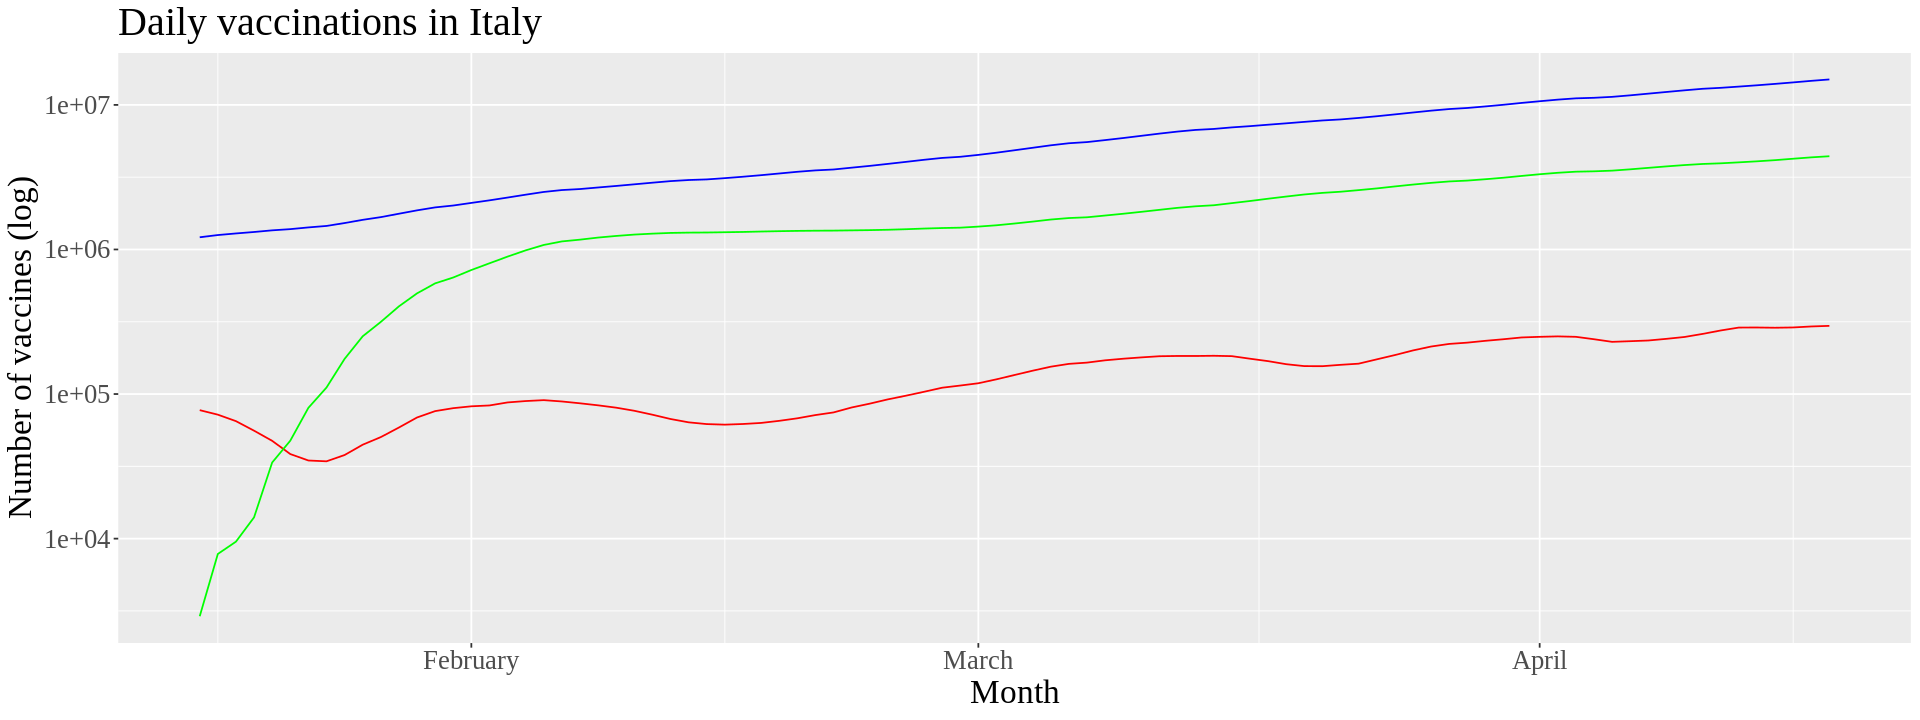

In [25]:
vax_italy <- dplyr::filter(vaccinations, iso_code=="ITA")
vax_italy <- vax_italy[complete.cases(vax_italy), ]

ggplot(vax_italy, aes(as.Date(date), total_vaccinations)) + geom_line(color='blue') +
geom_line(aes(as.Date(date), daily_vaccinations), color='red') +
geom_line(aes(as.Date(date), people_fully_vaccinated), color='green') + scale_x_date(date_labels = "%B") +
scale_y_log10() + labs(title='Daily vaccinations in Italy', x='Month', y='Number of vaccines (log)')

The growth of the number of total vaccinations (in blue) shows an exponential trend; while the number of daily vaccinations (in red) is subject to oscillations, the curve of people fully vaccinated (in green) is rather steady. As expected, people who got their first doses are prioritized to the second one, while the overall campaign is conditioned by a number of variable factors.